we assume that the price of house is defined by function y = X*a + b

using computational graph and deravative to find out a and b base on given X, y

In [206]:
area = [6.7, 4.6, 3.5, 5.5] #area of house
price = [9.1, 5.9, 4.6, 6.7] #price

In [207]:
#price y = X*a + b
def calculate_price(X, a, b):
    return X*a + b

In [208]:
#init random values for a and b
a = -0.34
b = 0.04

In [209]:
#we are going to calculate loss value base on this function
def loss_func(o, y):
    return (o-y)**2

In [210]:
#loss value if a and b are initial values
o = calculate_price(area[0], a, b)
loss = loss_func(o, price[0])
print(loss)

128.550244


Loss is 128.550244, it is too big so far.

In [211]:
#define deravative functions
def derivative_base_on_a(X, o, y):
    return 2*X*(o-y)

def derivative_base_on_b(o, y):
    return 2*(o-y)

In [212]:
da = derivative_base_on_a(area[0], o, price[0])
print(da)

db = derivative_base_on_b(o, price[0])
print(db)

-151.92919999999998
-22.676


In [213]:
def get_learing_rate(dx, lr=0.01):
    return (-dx*lr)

In [214]:
a += get_learing_rate(da)
b += get_learing_rate(db)
print('a: ' + str(a))
print('b: ' + str(b))

a: 1.1792919999999998
b: 0.26676


In [215]:
o = calculate_price(area[0], a, b)
loss = loss_func(o, price[0])
print(loss)

0.8685934306689611


Loss is 0.869 it is better previous 128.550244

In [216]:
a = -0.34
b = 0.04
learning_rate = 0.01
#we keep on with other values area and prive
loss_list = []
for i in range(8):
    for j in range(len(area)):
        o = calculate_price(area[j], a, b)
        loss = loss_func(o, price[j])
        loss_list.append(loss)
    
        da = derivative_base_on_a(area[j], o, price[j])
        db = derivative_base_on_b(o, price[j])
        
        a += get_learing_rate(da)
        b += get_learing_rate(db)

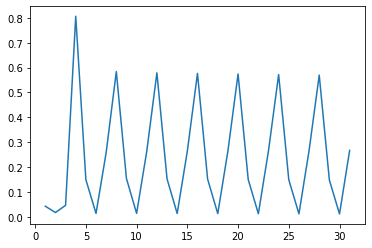

In [217]:
import matplotlib.pyplot as plt

l = len(loss_list)
x = list(range(l))
      
plt.plot(x[1:], loss_list[1:])
plt.show()

best index: 8
min loss: 0.10800472065504878
best a: 1.2408670640408037
best b: 0.30802388613972226


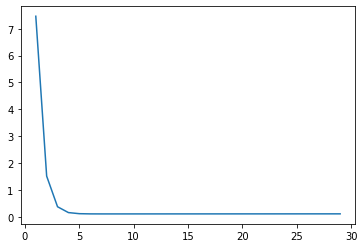

In [220]:
import numpy
import math
import random

#init random values
a = random.random()
b = random.random()

learning_rate = 0.01
#we keep on with other values area and prive
loss_list = []
a_list = []
b_list = []

area = numpy.array(area)
price = numpy.array(price)

for i in range(30):
    
    a_list.append(a)
    b_list.append(b)
    
    #try to predict price of house base on init values a and b
    o = calculate_price(area, a, b)
    
    #calculate loss value
    loss = loss_func(o, price)
    loss = sum(loss)/len(loss)
    loss_list.append(loss)

    #use derivative to update a, b
    da = derivative_base_on_a(area, o, price)
    db = derivative_base_on_b(o, price[j])
    
    da = sum(da)/len(da) #mean
    db = sum(db)/len(db) #mean
    
    #update a and b, for next loop
    a += (-da)*learning_rate
    b += (-db)*learning_rate

#print(loss_list)

idx = loss_list.index(min(loss_list))
print('best index: ' + str(idx))
print('min loss: ' + str(loss_list[idx]))
print('best a: ' + str(a_list[idx]))
print('best b: ' + str(b_list[idx]))

l = len(loss_list)
x = list(range(l))
plt.plot(x[1:], loss_list[1:])
plt.show()

The final result is y=X*1.2408670640408037 + 0.30802388613972226


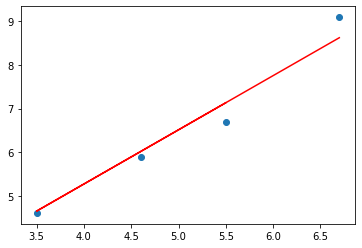

In [221]:
#draw best result 
print('The final result is y=X*{} + {}'.format(a_list[idx], b_list[idx]))

plt.scatter(area, price)
y = calculate_price(area, a_list[idx], b_list[idx])
plt.plot(area, y, c='r')

plt.show()